In [1]:
#   1. You are provided with the weekly sales data for their various outlets. Use statistical
#      analysis, EDA, outlier analysis, and handle the missing values to come up with various
#      insights that can give them a clear perspective on the following:
#         a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#            are suffering the most?
#         b. If the weekly sales show a seasonal trend, when and what could be the reason?
#         c. Does temperature affect the weekly sales in any manner?
#         d. How is the Consumer Price index affecting the weekly sales of various stores?
#         e. Top performing stores according to the historical data.
#         f. The worst performing store, and how significant is the difference between the
#            highest and lowest performing stores.
#     2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [2]:
import numpy as np
import pandas as pd

In [3]:
walmart = pd.read_csv('Walmart (1).csv')

In [4]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#   1. You are provided with the weekly sales data for their various outlets. Use statistical
#      analysis, EDA, outlier analysis, and handle the missing values to come up with various
#      insights that can give them a clear perspective on the following:

In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
walmart['Date'] = pd.to_datetime(walmart['Date'])

<ipython-input-7-6e8987b882c1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart['Date'] = pd.to_datetime(walmart['Date'])


In [8]:
walmart.set_index('Date',inplace = True)

In [9]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [10]:
walmart.isna().sum()  # no null values

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
# checking the outliers

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
col = list(walmart.columns)

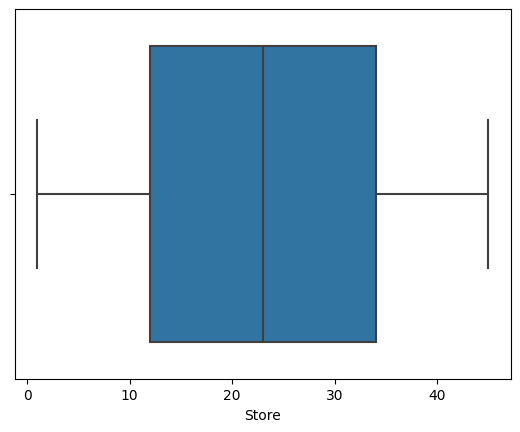

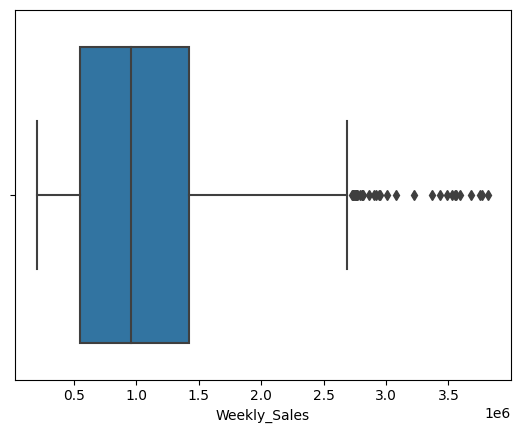

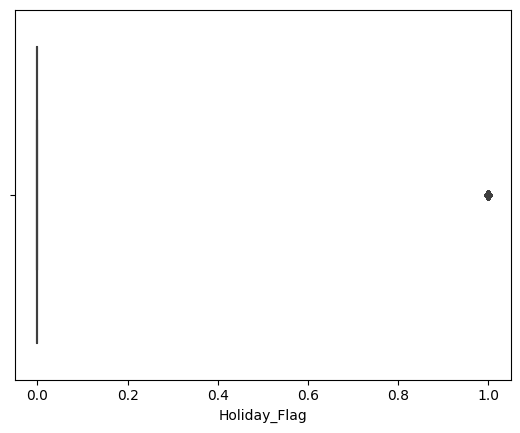

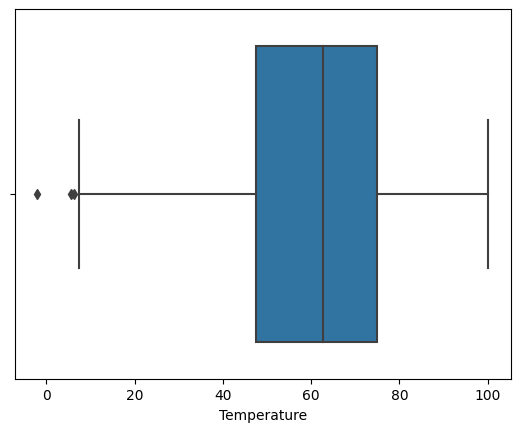

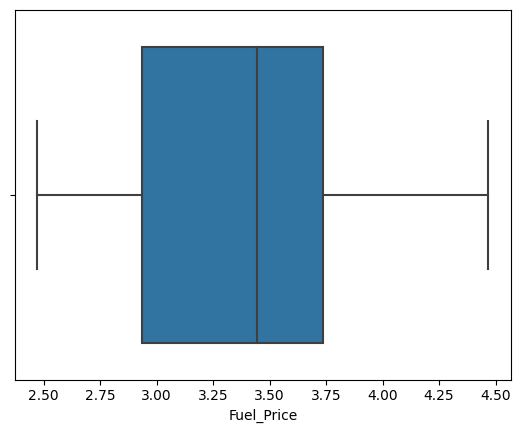

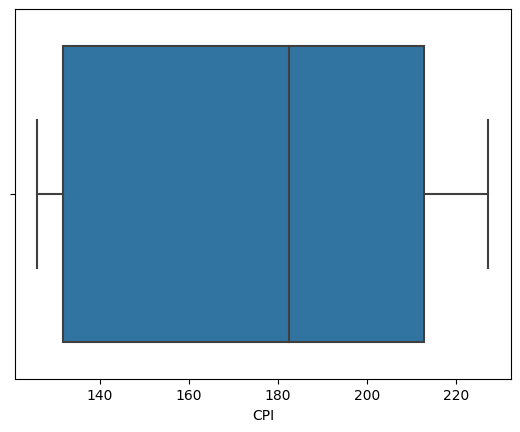

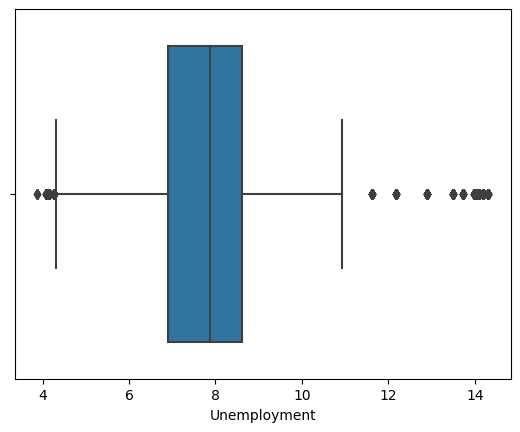

In [14]:
for columns in col:
  if (walmart[columns].dtypes == 'int64') | (walmart[columns].dtypes == 'float64'):
    sns.boxplot(x = walmart[columns])
    plt.show()

In [15]:
# as we can see from above outliers detecter graph ther are outliers in weekly-sales grpah but we are going to neglect this because it is part of sales data.

In [16]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [19]:
# Calculate the correlation between weekly sales and unemployment rate for each store
correlations = walmart.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]

# Identify the stores with the highest negative correlation (indicating higher unemployment affecting sales)
most_affected_stores = correlations.groupby('Store').mean().idxmin()

print("Stores suffering the most due to unemployment (highest negative correlation):")
print(most_affected_stores)

Stores suffering the most due to unemployment (highest negative correlation):
38


In [26]:
#         b. If the weekly sales show a seasonal trend, when and what could be the reason?
#         c. Does temperature affect the weekly sales in any manner?
#         d. How is the Consumer Price index affecting the weekly sales of various stores?
#         e. Top performing stores according to the historical data.
#         f. The worst performing store, and how significant is the difference between the
#            highest and lowest performing stores.
#     2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [36]:
correlations = walmart.groupby('Store')[['Weekly_Sales', 'Temperature']].corr().iloc[0::2, -1]

# Identify the stores with the highest positive correlation (indicating higher temperature affecting sales)
stores_most_affected_by_temperature = correlations.groupby('Store').mean().idxmax()

print("Stores most affected by temperature (highest positive correlation):")
print(stores_most_affected_by_temperature)

Stores most affected by temperature (highest positive correlation):
44


In [37]:
#         d. How is the Consumer Price index affecting the weekly sales of various stores?

In [38]:
correlations = walmart.groupby('Store')[['Weekly_Sales', 'CPI']].corr().iloc[0::2, -1]

# Identify the stores with the highest correlation (positive/negative) with CPI
stores_highest_correlation_with_cpi = correlations.groupby('Store').mean().idxmax()

print("Stores with the highest correlation with CPI:")
print(stores_highest_correlation_with_cpi)

Stores with the highest correlation with CPI:
38


In [39]:
#         e. Top performing stores according to the historical data.

In [40]:
total_sales_per_store = walmart.groupby('Store')['Weekly_Sales'].sum()

# Sort stores based on total historical sales in descending order
top_performing_stores = total_sales_per_store.sort_values(ascending=False)

print("Top Performing Stores (based on total historical sales):")
print(top_performing_stores.head())

Top Performing Stores (based on total historical sales):
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [41]:
#         f. The worst performing store, and how significant is the difference between the
#            highest and lowest performing stores.

In [42]:
worst_performing_store = total_sales_per_store.idxmin()
lowest_sales = total_sales_per_store.min()

# Find the top performing store (highest total sales)
best_performing_store = total_sales_per_store.idxmax()
highest_sales = total_sales_per_store.max()

# Calculate the difference between the highest and lowest sales
sales_difference = highest_sales - lowest_sales

In [43]:
print(sales_difference)

264237570.49999997


In [44]:
#     2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
weekly_sales = walmart.groupby(['Store', pd.Grouper(freq='W-Mon')])['Weekly_Sales'].sum().reset_index()

In [49]:
weekly_sales.head()

,Store,Date,Weekly_Sales
0,1,2010-01-11,1453329.50
1,1,2010-02-08,3087386.42
2,1,2010-02-22,1611968.17
3,1,2010-03-01,1409727.59
4,1,2010-03-15,3088197.31


In [50]:
# Function to forecast sales for a given store
def forecast_sales(store_sales):
    # SARIMA parameters
    order = (1, 1, 1)
    seasonal_order = (0, 1, 1, 12)  # A yearly seasonality (52 weeks)

    model = SARIMAX(store_sales, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Forecast for the next 12 weeks
    forecast_steps = 12
    forecast = model_fit.forecast(steps=forecast_steps)

    return forecast

In [51]:
forecasted_sales = {}
for store_num in weekly_sales['Store'].unique():
    store_sales = weekly_sales[weekly_sales['Store'] == store_num]['Weekly_Sales']
    forecasted_sales[store_num] = forecast_sales(store_sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

In [52]:
# Printing the forecasted sales for store 1
print("Forecasted Sales for Store 1 for the next 12 weeks:")
print(forecasted_sales[1])

Forecasted Sales for Store 1 for the next 12 weeks:
126    1.885731e+06
127    1.853177e+06
128    1.729969e+06
129    2.557681e+06
130    1.950032e+06
131    1.835209e+06
132    1.733610e+06
133    2.205495e+06
134    1.858031e+06
135    1.689135e+06
136    1.770010e+06
137    1.687130e+06
Name: predicted_mean, dtype: float64


In [54]:
# Step 9: Visualizing Forecasted Sales

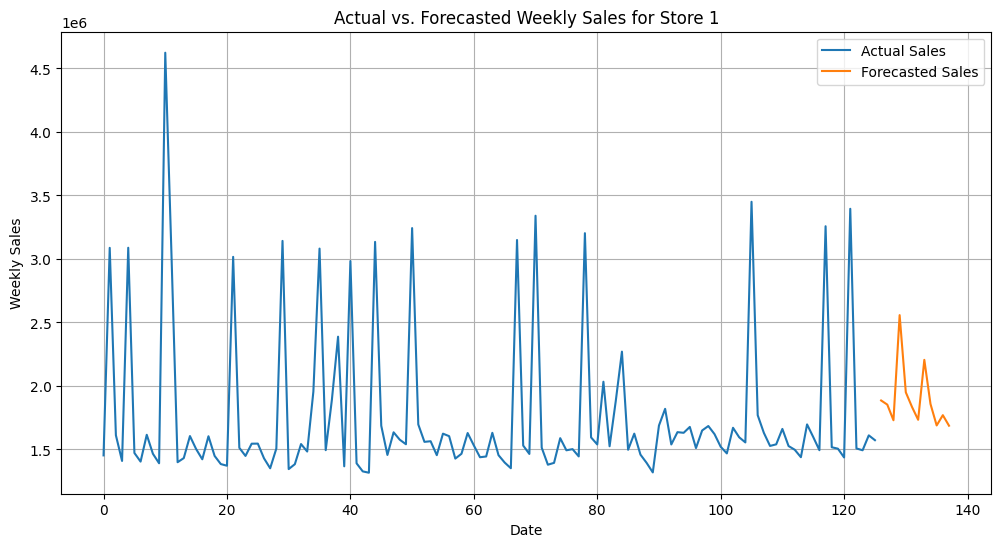

In [55]:
# Store 1 data
store1_sales = weekly_sales[weekly_sales['Store'] == 1]
actual_sales = store1_sales['Weekly_Sales']
forecasted_sales_store1 = forecasted_sales[1]

# Plot actual vs. forecasted sales for Store 1
plt.figure(figsize=(12, 6))
plt.plot(actual_sales.index, actual_sales, label='Actual Sales')
plt.plot(forecasted_sales_store1.index, forecasted_sales_store1, label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs. Forecasted Weekly Sales for Store 1')
plt.legend()
plt.grid(True)
plt.show()